**Importing Libraries and Dataset**

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [47]:
dataset=pd.read_csv('Ads_CTR_Optimisation.csv')

**Implementing Thompson sampling**

In [48]:
import random
N=500 # total number of rounds(users)
d=10    # no of ads
ads_selected=[]
numbers_of_rewards1=[0]*d
numbers_of_rewards0=[0]*d
total_rewards=0

In [49]:
for n in range(0,N):
  ad=0
  max_random=0
  for i in range(0,d):
    random_beta=random.betavariate(numbers_of_rewards1[i]+1,numbers_of_rewards0[i]+1)
    if(random_beta > max_random):
      max_random=random_beta
      ad=i
  ads_selected.append(ad)
  reward=dataset.values[n,ad]
  if(reward==1):
    numbers_of_rewards1[ad]+=1
  else:
    numbers_of_rewards0[ad]+=1
  total_rewards+=reward

**Visualizing  the result**

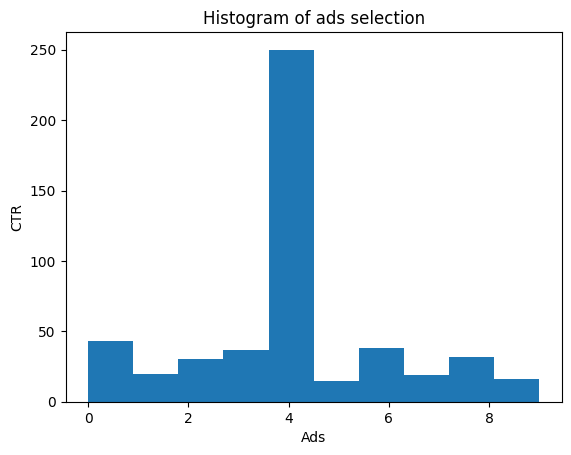

In [50]:
plt.hist(ads_selected)
plt.title('Histogram of ads selection')
plt.xlabel('Ads')
plt.ylabel('CTR')
plt.show()